In [121]:
import numpy as np
import matplotlib.pyplot as plt

Input layer takes 3 values. Input layer passes these values to the hidden layer of 4 neurons.

## Single step

In [30]:
input_vector = np.array([2, 4, 11])
input_vector_row = input_vector[None,:]
input_vector_column = input_vector[:,None]
print(input_vector, "\n\n", input_vector_row, "\n\n", input_vector_column)

[ 2  4 11] 

 [[ 2  4 11]] 

 [[ 2]
 [ 4]
 [11]]


[0.04742587 0.98201379] [0.04742587 0.98201379] sigma and expit are the same functions


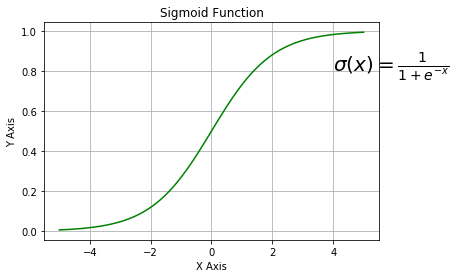

In [201]:
from scipy.special import expit as activation_function

@np.vectorize
def sigma(x):
    return 1 / (1 + np.e ** -x)

print(sigma([-3,4]), activation_function([-3,4]), 'sigma and expit are the same functions')

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'g')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=20)
plt.show()


[0.04742587317756678, 0.9820137900379085]

### Forward

In [62]:
input_vector_column = np.array([4, 4, 11])[:,None]

In [63]:
W1 = (np.random.binomial(100, 0.5, 12)/100).reshape((4,3))
layer1_vector = np.dot(W1,input_vector_column)
layer1_vector

array([[10.07],
       [ 8.75],
       [10.34],
       [ 9.41]])

In [64]:
W2 = (np.random.binomial(100, 0.5, 8)/100).reshape((2,4))
layer2_vector = np.dot(W2,layer1_vector)
layer2_vector

array([[18.3269],
       [19.4297]])

In [190]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * np.dot(tmp, input_vector.T)
    
    def run(self, input_vector):
        """
        running the network with an input vector input_vector. 
        input_vector can be tuple, list or ndarray
        """
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [197]:
n = NeuralNetwork(3,2,4,0.1) # in nodes, out nodes, nodes in hidden layer, learning rate

In [202]:
n.run([3,5,762])

array([[0.42822447],
       [0.47571285]])

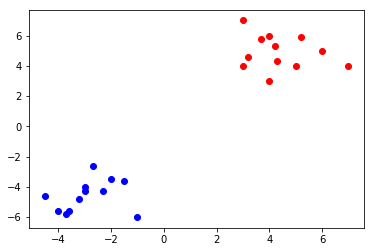

In [203]:
data1 = [((3, 4), (0.99, 0.01)), ((4.2, 5.3), (0.99, 0.01)), 
         ((4, 3), (0.99, 0.01)), ((6, 5), (0.99, 0.01)), 
         ((4, 6), (0.99, 0.01)), ((3.7, 5.8), (0.99, 0.01)), 
         ((3.2, 4.6), (0.99, 0.01)), ((5.2, 5.9), (0.99, 0.01)), 
         ((5, 4), (0.99, 0.01)), ((7, 4), (0.99, 0.01)), 
         ((3, 7), (0.99, 0.01)), ((4.3, 4.3), (0.99, 0.01))]
data2 = [((-3, -4), (0.01, 0.99)), ((-2, -3.5), (0.01, 0.99)), 
         ((-1, -6), (0.01, 0.99)), ((-3, -4.3), (0.01, 0.99)), 
         ((-4, -5.6), (0.01, 0.99)), ((-3.2, -4.8), (0.01, 0.99)), 
         ((-2.3, -4.3), (0.01, 0.99)), ((-2.7, -2.6), (0.01, 0.99)), 
         ((-1.5, -3.6), (0.01, 0.99)), ((-3.6, -5.6), (0.01, 0.99)), 
         ((-4.5, -4.6), (0.01, 0.99)), ((-3.7, -5.8), (0.01, 0.99))]
data = data1 + data2
np.random.shuffle(data)
points1, labels1 = zip(*data1)
X, Y = zip(*points1)
plt.scatter(X, Y, c="r")
points2, labels2 = zip(*data2)
X, Y = zip(*points2)
plt.scatter(X, Y, c="b")
plt.show()

In [223]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=2,
                               learning_rate=0.6)
    
size_of_learn_sample = int(len(data)*0.9)
learn_data = data[:size_of_learn_sample]
test_data = data[-size_of_learn_sample:]

for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    simple_network.train(point, label)
    
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    cls1, cls2 =simple_network.run(point)
    print(point, cls1, cls2, end=": ")
    if cls1 > cls2:
        if label == (0.99, 0.01):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)
    else:
        if label == (0.01, 0.99):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)

(-3.6, -5.6) [0.34354213] [0.64135166]: class1 correct (0.01, 0.99)
(-1.5, -3.6) [0.35182722] [0.63362899]: class1 correct (0.01, 0.99)
(4.2, 5.3) [0.45512589] [0.51621247]: class2 incorrect (0.99, 0.01)
(5.2, 5.9) [0.45561275] [0.51574307]: class2 incorrect (0.99, 0.01)
(4, 6) [0.45957625] [0.51455412]: class2 incorrect (0.99, 0.01)
(-3, -4.3) [0.34920249] [0.63836085]: class1 correct (0.01, 0.99)
(-2.7, -2.6) [0.35962767] [0.63210211]: class1 correct (0.01, 0.99)
(4, 3) [0.44151181] [0.52219154]: class2 incorrect (0.99, 0.01)
(3, 7) [0.46723737] [0.51193036]: class2 incorrect (0.99, 0.01)
(-3.7, -5.8) [0.34277773] [0.64170853]: class1 correct (0.01, 0.99)
(-2.3, -4.3) [0.34795195] [0.63796571]: class1 correct (0.01, 0.99)
(3.7, 5.8) [0.45928999] [0.51478704]: class2 incorrect (0.99, 0.01)
(-3.2, -4.8) [0.34682002] [0.63967804]: class1 correct (0.01, 0.99)
(-1, -6) [0.33682788] [0.64193317]: class1 correct (0.01, 0.99)
(3.2, 4.6) [0.45364316] [0.51753118]: class2 incorrect (0.99, 0.01